<a href="https://colab.research.google.com/github/yongjaeahn/python_coding/blob/main/korean/source/10_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%BD%94%EB%94%A9_%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

	선형 회귀 알고리즘

데이터 수집

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

print(type(diabetes))
print(dir(diabetes))

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
help(load_diabetes)

Help on function load_diabetes in module sklearn.datasets._base:

load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
    Load and return the diabetes dataset (regression).
    
    ==============   ==================
    Samples total    442
    Dimensionality   10
    Features         real, -.2 < x < .2
    Targets          integer 25 - 346
    ==============   ==================
    
    .. note::
       The meaning of each feature (i.e. `feature_names`) might be unclear
       (especially for `ltg`) as the documentation of the original dataset is
       not explicit. We provide information that seems correct in regard with
       the scientific literature in this field of research.
    
    Read more in the :ref:`User Guide <diabetes_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
    

데이터 전처리

In [ ]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print(diabetes.data[0:3])
print(diabetes.data[-1:-3:-1])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
[[-0.04547248 -0.04464164 -0.0730303  -0.08141314  0.08374012  0.02780893
   0.17381578 -0.03949338 -0.00422151  0.00306441]
 [-0.04547248 -0.04464164  0.03906215  0.00121528  0.01631843  0.01528299
  -0.02867429  0.02655962  0.04452873 -0.02593034]]


In [ ]:
print(diabetes.target[0:3])
print(diabetes.target[-1:-3:-1])

[151.  75. 141.]
[ 57. 220.]


In [ ]:
import numpy as np

def normalize(values):
  mean = np.mean(values)    # 평균
  std = np.std(values)      # 표준편차
  # 정규화 = (값 - 평균) / 표준편차
  normalized = (values - mean) / std

  return normalized

ages = np.array([50,45,20,60,63,57,40,47,30,58])
normalized_ages = normalize(ages)
print('정규화된 나이 :',normalized_ages)

bmis = np.array([30,28,22,28,27,32,27,22,25,29])
normalized_bmis = normalize(bmis)
print('정규화된 체질량 지수 :',normalized_bmis)

정규화된 나이 : [ 0.22834992 -0.15223328 -2.05514926  0.98951631  1.21786623  0.76116639
 -0.53281647  0.         -1.29398287  0.83728303]
정규화된 체질량 지수 : [ 0.97849211  0.32616404 -1.63082018  0.32616404  0.          1.63082018
  0.         -1.63082018 -0.65232807  0.65232807]


In [ ]:
sex = np.array(['M','F','F','M','M','F','F','F','M','F'])
sex_numeric = np.where(sex == 'M',1,0)
print('수치화된 성별 :',sex_numeric)
normalized_sex = normalize(sex_numeric)
print('정규화된 성별 :',normalized_sex)

수치화된 성별 : [1 0 0 1 1 0 0 0 1 0]
정규화된 성별 : [ 1.22474487 -0.81649658 -0.81649658  1.22474487  1.22474487 -0.81649658
 -0.81649658 -0.81649658  1.22474487 -0.81649658]


In [ ]:
from sklearn.preprocessing import StandardScaler

diabetes_features = np.array(list(zip(ages,sex_numeric,bmis)))
print('당뇨병 특징 :\n',diabetes_features)

scaler = StandardScaler()
normalized_diabetes_features = scaler.fit_transform(diabetes_features)

print('정규화된 당뇨병 특징 :\n',normalized_diabetes_features)

당뇨병 특징 :
 [[50  1 30]
 [45  0 28]
 [20  0 22]
 [60  1 28]
 [63  1 27]
 [57  0 32]
 [40  0 27]
 [47  0 22]
 [30  1 25]
 [58  0 29]]
정규화된 당뇨병 특징 :
 [[ 0.22834992  1.22474487  0.97849211]
 [-0.15223328 -0.81649658  0.32616404]
 [-2.05514926 -0.81649658 -1.63082018]
 [ 0.98951631  1.22474487  0.32616404]
 [ 1.21786623  1.22474487  0.        ]
 [ 0.76116639 -0.81649658  1.63082018]
 [-0.53281647 -0.81649658  0.        ]
 [ 0.         -0.81649658 -1.63082018]
 [-1.29398287  1.22474487 -0.65232807]
 [ 0.83728303 -0.81649658  0.65232807]]


모델 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(diabetes.data,diabetes.target)
print('훈련된 회귀방정식의 계수 :',model.coef_)
print('훈련된 회귀방정식의 절편 :',model.intercept_)

훈련된 회귀방정식의 계수 : [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
훈련된 회귀방정식의 절편 : 152.13348416289597


모델 테스트

In [ ]:
print('1년 후 당뇨병 진행의 정량적 측정치 예측을 위한 10개의 독립변수 :\n', diabetes.data[0:3])
y_prediction = model.predict(diabetes.data[0:3])

print('회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치:', y_prediction)
print('회귀분석 모델에 사용된 1년 후 당뇨병 진행의 정량적 측정치:', diabetes.target[0:3])

1년 후 당뇨병 진행의 정량적 측정치 예측을 위한 10개의 독립변수 :
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치: [206.11667725  68.07103297 176.88279035]
회귀분석 모델에 사용된 1년 후 당뇨병 진행의 정량적 측정치: [151.  75. 141.]


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# 데이터 수집 및 전처리
diabetes = load_diabetes()

# 모델 훈련
model = LinearRegression()
model.fit(diabetes.data,diabetes.target)

# 모델 테스트
y_prediction = model.predict(diabetes.data[0:3])
print('회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치:', y_prediction)

회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치: [206.11667725  68.07103297 176.88279035]


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# 데이터 수집 및 전처리
diabetes = load_diabetes(as_frame=True)

# 모델 훈련
model = LinearRegression()
model.fit(diabetes.data,diabetes.target)

# 모델 테스트
y_prediction = model.predict(diabetes.data[0:3])
print('회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치:', y_prediction)

회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치: [206.11667725  68.07103297 176.88279035]


In [ ]:
print(diabetes.data)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [ ]:
print(diabetes.target)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


모델 평가

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = \
train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

In [ ]:
print('전체 데이터의 갯수 :',len(diabetes.data))
print('학습 데이터의 갯수 :',len(data_train))
print('테스트 데이터의 갯수 :',len(data_test))
print('테스트 데이터의 비율 :',len(target_test) / len(diabetes.data))

전체 데이터의 갯수 : 442
학습 데이터의 갯수 : 353
테스트 데이터의 갯수 : 89
테스트 데이터의 비율 : 0.20135746606334842


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(diabetes.target[0:3],y_prediction)
r_square = r2_score(diabetes.target[0:3],y_prediction)
print('평균제곱오차 :',mse)
print('R 스퀘어 :',r_square)

평균제곱오차 : 1457.8111126596916
R 스퀘어 : -0.28228108033006505


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 수집 및 전처리
diabetes = load_diabetes(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

# 모델 훈련
model = LinearRegression()
model.fit(data_train,target_train)

# 모델 테스트
y_prediction = model.predict(data_test)

# 모델 평가
mse = mean_squared_error(target_test,y_prediction)
r_square = r2_score(target_test,y_prediction)
print('평균제곱오차 :',mse)
print('R 스퀘어 :',r_square)

평균제곱오차 : 3424.2593342986925
R 스퀘어 : 0.3322332173106183


	로지스틱 회귀 알고리즘

데이터 수집 및 전처리

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [ ]:
print(iris.data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
print(iris.target)
print(iris.target[50:56])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64
50    1
51    1
52    1
53    1
54    1
55    1
Name: target, dtype: int64


In [ ]:
print(dir(iris))
print(iris.target_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['setosa' 'versicolor' 'virginica']


모델 훈련

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(data_train,target_train)
print('훈련된 회귀방정식의 계수 :',model.coef_)

훈련된 회귀방정식의 계수 : [[-0.39345168  0.8511139  -2.3601146  -1.01214086]
 [ 0.40917579 -0.31929939 -0.14621045 -0.78817065]
 [-0.01572411 -0.53181451  2.50632505  1.80031151]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(data_train,target_train)
print('훈련된 회귀방정식의 계수 :',model.coef_)

훈련된 회귀방정식의 계수 : [[-0.39404717  0.84858916 -2.360915   -1.01267644]
 [ 0.41037412 -0.31739232 -0.14619146 -0.78742476]
 [-0.01632695 -0.53119684  2.50710646  1.8001012 ]]


모델 테스트

In [ ]:
y_prediction = model.predict(data_test)
print('회귀분석 모델로 예측한 붓꽃의 종류:', y_prediction)

회귀분석 모델로 예측한 붓꽃의 종류: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


모델 평가

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_test, y_prediction)
print('정확도:', accuracy)

정확도: 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
model = LogisticRegression(max_iter=1000)
model.fit(data_train,target_train)

# 모델 테스트
y_prediction = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_prediction)
print('정확도:', accuracy)

정확도: 1.0


	K-최근접 이웃 분류 알고리즘

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(data_train,target_train)

# 모델 테스트
y_prediction = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_prediction)
print('정확도:', accuracy)

정확도: 0.9666666666666667


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(data_train,target_train)

# 모델 테스트
y_prediction = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_prediction)
print('정확도:', accuracy)

정확도: 0.9666666666666667


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
k = 7
model = KNeighborsClassifier(n_neighbors=k)
model.fit(data_train,target_train)

# 모델 테스트
y_prediction = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_prediction)
print('정확도:', accuracy)

정확도: 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
k = 100
model = KNeighborsClassifier(n_neighbors=k)
model.fit(data_train,target_train)

# 모델 테스트
y_prediction = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_prediction)
print('정확도:', accuracy)

정확도: 0.5666666666666667


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

k = 3
target_accuracy = 0.99

while True:
# 모델 훈련
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(data_train,target_train)

# 모델 테스트
  y_prediction = model.predict(data_test)

# 모델 평가
  accuracy = accuracy_score(target_test, y_prediction)
  print('K:',k,', 정확도:', accuracy)

  if accuracy > target_accuracy: break

  k = k + 1

K: 3 , 정확도: 0.9666666666666667
K: 4 , 정확도: 1.0


	결정트리 분류 알고리즘

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
model = DecisionTreeClassifier()
model.fit(data_train,target_train)

# 모델 테스트
y_prediction = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_prediction)
print('정확도:', accuracy)

정확도: 1.0


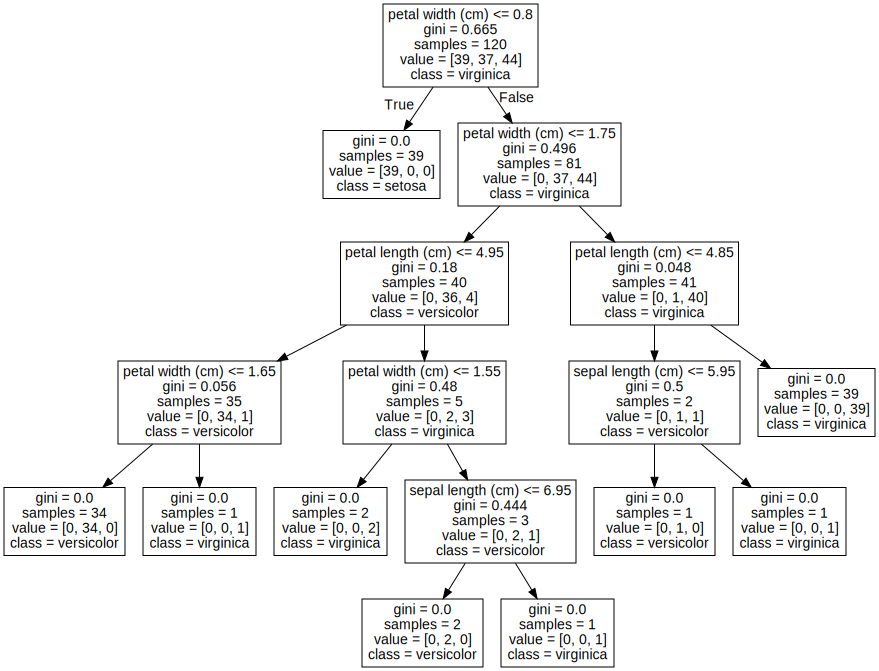

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                out_file='decision tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names)

with open('decision tree.dot') as viz:
  decision_tree = viz.read()

graphviz.Source(decision_tree)

	K-평균 군집분석(K-Means Clustering) 알고리즘

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터 수집 및 전처리
iris = load_iris()
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
model = KMeans(n_clusters=3,n_init=10,random_state=0)   # K 파라메터를 3으로 고정
model.fit(data_train)

# 모델 테스트
y_prediction = model.predict(data_test)

# 모델 평가
print('실데이터로 알려진 분류:\t',target_test)
print('모델로 예측된 분류:\t',y_prediction)
score = silhouette_score(data_test, y_prediction)
print('Silhouette Score:',score)

실데이터로 알려진 분류:	 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
모델로 예측된 분류:	 [2 2 1 0 1 0 1 2 2 2 0 2 2 2 2 1 2 2 1 1 2 2 1 1 2 1 1 2 2 1]
Silhouette Score: 0.5537338197470287


In [ ]:
print(model.cluster_centers_)

[[6.87777778 3.08888889 5.69444444 2.06666667]
 [5.02051282 3.4025641  1.46153846 0.24102564]
 [5.82888889 2.72222222 4.35333333 1.42222222]]


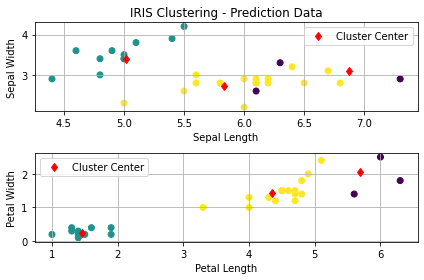

In [ ]:
import matplotlib.pyplot as plt

sepal_length = data_test[:,0]
sepal_width = data_test[:,1]
petal_length = data_test[:,2]
petal_width = data_test[:,3]

sepal_length_cluster_center = model.cluster_centers_[:,0]
sepal_width_cluster_center = model.cluster_centers_[:,1]
petal_length_cluster_center = model.cluster_centers_[:,2]
petal_width_cluster_center = model.cluster_centers_[:,3]

plt.subplot(2,1,1)
plt.scatter(sepal_length,sepal_width,c=y_prediction)
plt.title('IRIS Clustering - Prediction Data')
plt.plot(sepal_length_cluster_center,sepal_width_cluster_center,'rd',label='Cluster Center')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()

plt.subplot(2,1,2)
plt.scatter(petal_length,petal_width,c=y_prediction)
plt.plot(petal_length_cluster_center,petal_width_cluster_center,'rd',label='Cluster Center')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid()

plt.tight_layout()
plt.show()

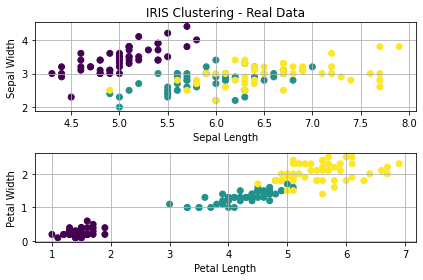

In [ ]:
import matplotlib.pyplot as plt

sepal_length = iris.data[:,0]
sepal_width = iris.data[:,1]
petal_length = iris.data[:,2]
petal_width = iris.data[:,3]

plt.subplot(2,1,1)
plt.scatter(sepal_length,sepal_width,c=iris.target)
plt.title('IRIS Clustering - Real Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()

plt.subplot(2,1,2)
plt.scatter(petal_length,petal_width,c=iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
model = KMeans(n_clusters=3,n_init=10,random_state=0)   # K 파라메터를 3으로 고정
model.fit(data_train)

# 모델 테스트
y_prediction = model.predict(iris.data)

# 모델 평가
print('실데이터로 알려진 분류:\t',iris.target)
print('모델로 예측된 분류:\t',y_prediction)
score = silhouette_score(iris.data, y_prediction)
print('Silhouette Score:',score)

실데이터로 알려진 분류:	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
모델로 예측된 분류:	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Silhouette Score: 0.551191604619592


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

y_prediction=np.where(y_prediction == 1,3,y_prediction)
y_prediction=np.where(y_prediction == 2,1,y_prediction)
y_prediction=np.where(y_prediction == 0,2,y_prediction)
y_prediction=np.where(y_prediction == 3,0,y_prediction)
print('모델로 예측된 분류의 보정:',y_prediction)
accuracy = accuracy_score(iris.target, y_prediction)
print('정확도:', accuracy)

모델로 예측된 분류의 보정: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
정확도: 0.8866666666666667


	인공신경망

In [ ]:
import tensorflow as tf

w = tf.Variable(2)
b = tf.Variable(1)

@tf.function
def f(x):
  return w*x + b

y = f(10)

print('f(10) 방정식의 수행결과 (Tensor):',y)
print('f(10) 방정식의 수행결과 (Numpy):',y.numpy())

f(10) 방정식의 수행결과 (Tensor): tf.Tensor(21, shape=(), dtype=int32)
f(10) 방정식의 수행결과 (Numpy): 21


	경사하강법 최적화 알고리즘을 활용한 선형 회귀

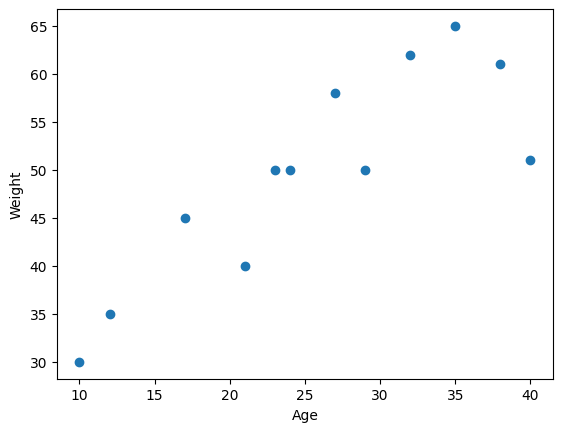

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ages = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
weights = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

plt.scatter(ages,weights)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [ ]:
import numpy as np

x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

epochs = 5000
learning_rate = 0.001

w = np.random.rand()
b = np.random.rand()

for epoch in range(epochs):
  y_hat = w * x + b

  error = np.mean((y - y_hat)**2)

  w_gradient = -2 * np.mean((y - y_hat) * x)
  b_gradient = -2 * np.mean(y - y_hat)

  w = w - learning_rate * w_gradient
  b = b - learning_rate * b_gradient

print('최적화된 w:',w)
print('최적화된 b:',b)

최적화된 w: 1.219571701996804
최적화된 b: 17.542091550965875


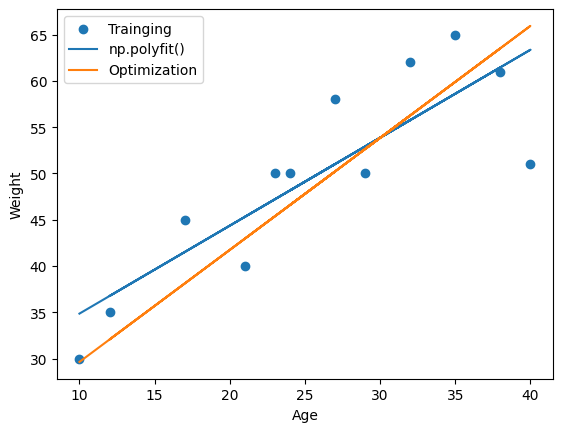

In [ ]:
import matplotlib.pyplot as plt

y1 = 0.95 * x + 25.36   # np.polyfit()으로 구한 회귀방정식
y2 = 1.21 * x + 17.54   # 경사하강 최적화 알고리즘으로 구한 회귀방정식

plt.scatter(x,y,label='Trainging')
plt.plot(x,y1,label='np.polyfit()')
plt.plot(x,y2,label='Optimization')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = ages = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = weights = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

w = np.sum(y * (x - x.mean())) / np.sum((x - x.mean())**2)
b = y.mean() - w * x.mean()

print('y =',w,'x + ',b)

y = 0.9501607717041793 x +  25.362540192926062


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([[10],[17],[27],[24],[38],[35],[29],[40],[12],[32],[23],[21]])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

model = LinearRegression()
model.fit(x,y)

print('y =',model.coef_[0],'x + ',model.intercept_)

y = 0.9501607717041805 x +  25.362540192926033


	인공신경망을 활용한 선형 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 수집 및 전처리
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

# 모델 훈련
model = tf.keras.Sequential()             # 인공신경망 모델 정의
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
model.compile(optimizer='sgd',loss='mse') # 인공신경망 모델 컴파일

model.fit(x,y,epochs=1000,verbose=False)

w, b = model.get_weights()
print("w:", w, "b:", b)

# 모델 테스트
y_prediction = model.predict(x)

w: [[nan]] b: [nan]
1/1 [==============================] - 0s 54ms/step


In [ ]:
print("숫자 1:",(1))
print("숫자 2:",(2))

숫자 1: 1
숫자 2: 2


In [ ]:
print("튜플 1:",(1,))
print("튜플 2:",(2,))
print("튜플 28*28:",(28*28,))
print("튜플 (1,2):",(1,2))

튜플 1: (1,)
튜플 2: (2,)
튜플 28*28: (784,)
튜플 (1,2): (1, 2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 수집 및 전처리
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

# 모델 훈련
model = tf.keras.Sequential()             # 인공신경망 모델 정의
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
sgd = tf.keras.optimizers.SGD(learning_rate=0.001) # sgd의 Default 학습율은 0.01
#model.compile(optimizer='sgd',loss='mse') # 인공신경망 모델 컴파일
model.compile(optimizer=sgd,loss='mse')   # 인공신경망 모델 컴파일

model.fit(x,y,epochs=1000,verbose=False)

w, b = model.get_weights()
print("w:", w, "b:", b)

# 모델 테스트
y_prediction = model.predict(x)

w: [[1.642014]] b: [5.2794557]
1/1 [==============================] - 0s 251ms/step


최적화된 w: 1.2140178654150235
최적화된 b: 17.7033080751302


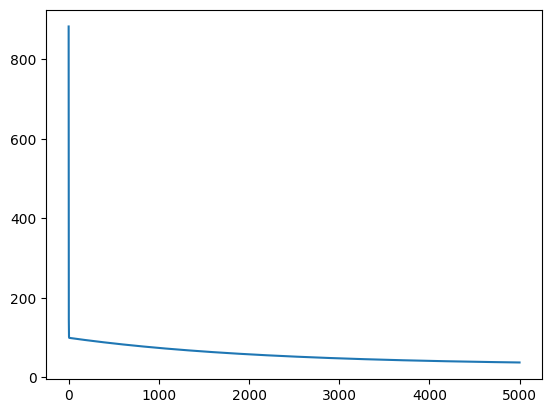

In [ ]:
import numpy as np

x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

epochs = 5000
learning_rate = 0.001

errors = []
#w_gradients = []
#b_gradients = []

w = np.random.rand()
b = np.random.rand()

for epoch in range(epochs):
  y_hat = w * x + b

  error = np.mean((y - y_hat)**2)
  errors.append(error)

  w_gradient = -2 * np.mean((y - y_hat) * x)
  b_gradient = -2 * np.mean(y - y_hat)

  w = w - learning_rate * w_gradient
  b = b - learning_rate * b_gradient

print('최적화된 w:',w)
print('최적화된 b:',b)

import matplotlib.pyplot as plt

plt.plot(errors)
#plt.plot(w_gradients)
#plt.plot(b_gradients)
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-3-ca71b11f48bc>:20: RuntimeWarning: overflow encountered in square
  error = np.mean((y - yHat)**2)
<ipython-input-3-ca71b11f48bc>:26: RuntimeWarning: invalid value encountered in double_scalars
  w = w - learningRate * wGradient


최적화된 w: nan
최적화된 b: nan


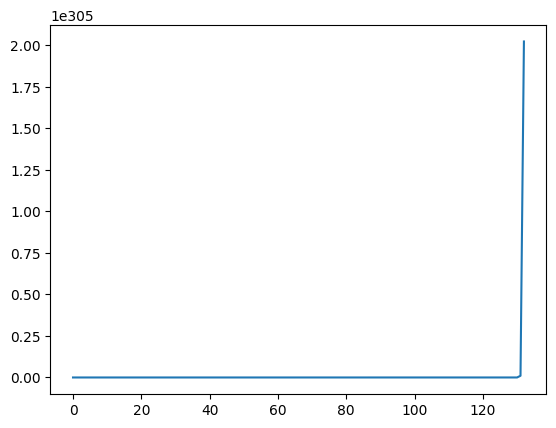

In [ ]:
import numpy as np

x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

epochs = 5000
#learning_rate = 0.001
learning_rate = 0.01

errors = []
#w_gradients = []
#b_gradients = []

w = np.random.rand()
b = np.random.rand()

for epoch in range(epochs):
  y_hat = w * x + b

  error = np.mean((y - y_hat)**2)
  errors.append(error)

  w_gradient = -2 * np.mean((y - y_hat) * x)
  b_gradient = -2 * np.mean(y - y_hat)

  w = w - learning_rate * w_gradient
  b = b - learning_rate * b_gradient

print('최적화된 w:',w)
print('최적화된 b:',b)

import matplotlib.pyplot as plt

plt.plot(errors)
#plt.plot(w_gradients)
#plt.plot(b_gradients)
plt.show()

<ipython-input-4-ea888e6c6913>:20: RuntimeWarning: overflow encountered in square
  error = np.mean((y - yHat)**2)
<ipython-input-4-ea888e6c6913>:28: RuntimeWarning: invalid value encountered in double_scalars
  w = w - learningRate * wGradient


최적화된 w: nan
최적화된 b: nan


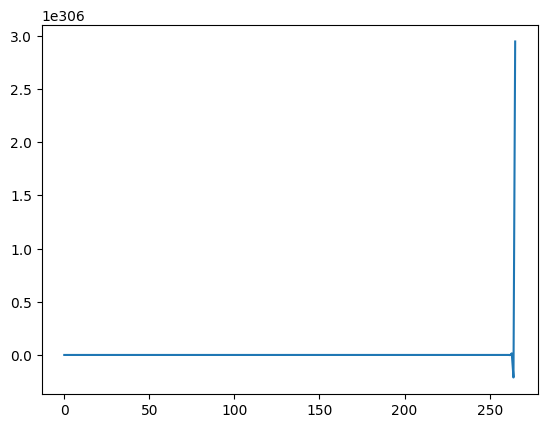

In [ ]:
import numpy as np

x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

epochs = 5000
#learning_rate = 0.001
learning_rate = 0.01

#errors = []
w_gradients = []
#b_gradients = []

w = np.random.rand()
b = np.random.rand()

for epoch in range(epochs):
  y_hat = w * x + b

  error = np.mean((y - y_hat)**2)
  #errors.append(error)

  w_gradient = -2 * np.mean((y - y_hat) * x)
  w_gradients.append(w_gradient)

  b_gradient = -2 * np.mean(y - y_hat)

  w = w - learning_rate * w_gradient
  b = b - learning_rate * b_gradient

print('최적화된 w:',w)
print('최적화된 b:',b)

import matplotlib.pyplot as plt

#plt.plot(errors)
plt.plot(w_gradients)
#plt.plot(b_gradients)
plt.show()

In [ ]:
# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y,y_prediction)
r_square = r2_score(y,y_prediction)
print('평균제곱오차 :',mse)
print('R 스퀘어 :',r_square)

평균제곱오차 : 77.20440459292058
R 스퀘어 : 0.28966620271033394


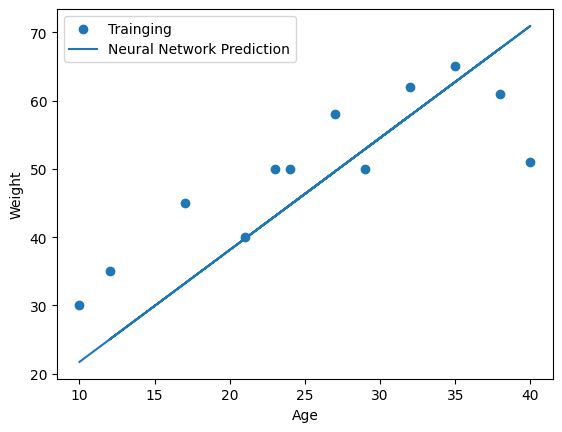

In [ ]:
plt.scatter(x,y,label='Trainging')
plt.plot(x,y_prediction,label='Neural Network Prediction')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


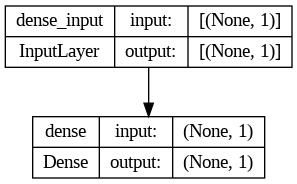

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True,to_file='model.png')

	인공신경망의 활성화 함수

In [ ]:
y_prediction = model.predict(x)
print('x가', x[0],'일때의 예측치(model.predict(x)) :', y_prediction[0])
print('x가', x[3],'일때의 예측치(model.predict(x)) :', y_prediction[3])

w, b = model.get_weights()
print('x가', x[0],'일때의 예측치(y = wx + b) :',w[0] * x[0] + b[0])
print('x가', x[3],'일때의 예측치(y = wx + b) :',w[0] * x[3] + b[0])

1/1 [==============================] - 0s 80ms/step
x가 10 일때의 예측치(model.predict(x)) : [21.684343]
x가 24 일때의 예측치(model.predict(x)) : [44.68376]
x가 10 일때의 예측치(y = wx + b) : [21.684343]
x가 24 일때의 예측치(y = wx + b) : [44.68376]


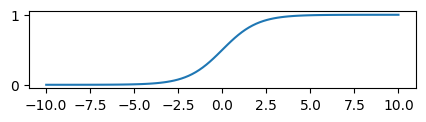

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,100)
plt.figure(figsize=(5,1))
plt.plot(x,sigmoid(x))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 수집 및 전처리
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

# 모델 훈련
model = tf.keras.Sequential()             # 인공신경망 모델 정의
model.add(tf.keras.layers.Dense(1,input_shape=(1,),activation='sigmoid'))
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd,loss='mse')   # 인공신경망 모델 컴파일

model.fit(x,y,epochs=1000,verbose=False)

# 모델 테스트
y_prediction = model.predict(x)
print('x가', x[0],'일때의 예측치(model.predict(x)) :', y_prediction[0])
print('x가', x[3],'일때의 예측치(model.predict(x)) :', y_prediction[3])

w, b = model.get_weights()
print('x가', x[0],'일때의 예측치(sigmoid(wx + b)) :',sigmoid(w[0] * x[0] + b[0]))
print('x가', x[3],'일때의 예측치(sigmoid(wx + b)) :',sigmoid(w[0] * x[3] + b[0]))

1/1 [==============================] - 0s 52ms/step
x가 10 일때의 예측치(model.predict(x)) : [0.9999973]
x가 24 일때의 예측치(model.predict(x)) : [1.]
x가 10 일때의 예측치(sigmoid(wx + b)) : [0.9999974]
x가 24 일때의 예측치(sigmoid(wx + b)) : [1.]


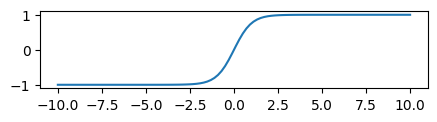

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

x = np.linspace(-10,10,100)
plt.figure(figsize=(5,1))
plt.plot(x,tanh(x))
plt.show()

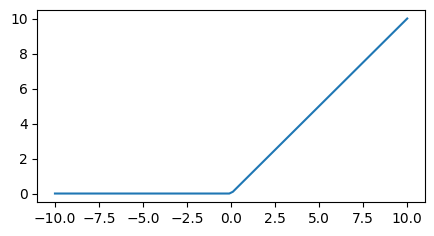

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0,x)

x = np.linspace(-10,10,100)
plt.figure(figsize=(5,2.5))
plt.plot(x,relu(x))
plt.show()

	인공신경망을 활용한 로지스틱 회귀

다중 분류

In [ ]:
import tensorflow as tf

# 데이터 수집 및 전처리
#(number_images,_),(_,_) = tf.keras.datasets.mnist.load_data()
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# 인공신경망 모델 정의 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train,epochs=10,verbose=True)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print('손실:', loss)
print('정확도:', accuracy)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 18.3256 - accuracy: 0.8297
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9070 - accuracy: 0.8457
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0575 - accuracy: 0.8503
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6910 - accuracy: 0.8523
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4339 - accuracy: 0.8547
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2870 - accuracy: 0.8555
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1377 - accuracy: 0.8597
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0368 - accuracy: 0.8609
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9896 - accuracy: 0.8595
Epoch 10/10
313/

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


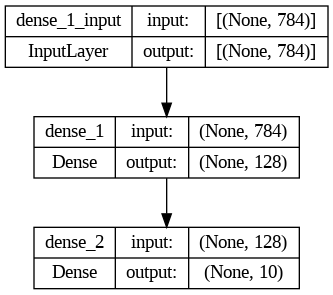

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True,to_file='model.png')

In [ ]:
# 모델 테스트
y_prediction = model.predict(x_test[:2])

1/1 [==============================] - 0s 92ms/step


In [ ]:
y_prediction

array([[9.7136104e-09, 4.4502935e-21, 3.9936110e-13, 2.2050843e-07,
        1.0377390e-15, 8.2143270e-09, 1.5179986e-22, 9.9999976e-01,
        1.6154470e-12, 1.5454715e-08],
       [2.7604461e-15, 8.9490023e-18, 1.0000000e+00, 2.6210458e-15,
        2.4296381e-35, 3.5572346e-12, 4.9417350e-09, 5.1523536e-38,
        3.4373074e-10, 9.0126995e-31]], dtype=float32)

In [ ]:
print(sum(y_prediction[0]),sum(y_prediction[1]))

1.0000000154745146 1.0000000052890283


In [ ]:
import numpy as np

np.argmax(y_prediction[0])

7

In [ ]:
y_test[0]

7

In [ ]:
np.argmax(y_prediction[1])

2

In [ ]:
y_test[1]

2

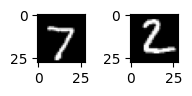

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(x_test[0],(28,28)),cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(x_test[1],(28,28)),cmap='gray')

plt.tight_layout()
plt.show()

이진 분류

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터 수집 및 전처리
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

y_train_odd_or_even = y_train % 2
y_test_odd_or_even = y_test % 2

# 인공신경망 모델 정의 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train_odd_or_even,epochs=10,verbose=False)

# 모델 테스트
y_prediction = model.predict(x_test)
for i in range(5):      # 데이터의 수가 많아 5까지만 출력
  print('y_prediction[',i,']:',y_prediction[i])
  if y_prediction[i] < 0.5:
    print(y_test[i],': 짝수')
  else:
    print(y_test[i],': 홀수')

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test_odd_or_even)
print('손실:', loss)
print('정확도:', accuracy)

313/313 [==============================] - 1s 2ms/step
y_predict[ 0 ]: [0.9998809]
7 : 홀수
y_predict[ 1 ]: [1.0709907e-06]
2 : 짝수
y_predict[ 2 ]: [0.9835243]
1 : 홀수
y_predict[ 3 ]: [0.00405308]
0 : 짝수
y_predict[ 4 ]: [0.1838071]
4 : 짝수
313/313 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8758
손실: 0.3730488717556
정확도: 0.8758000135421753


	CNN  합성곱신경망을 활용한 로지스틱 회귀

다중 분류

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터 수집 및 전처리
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

# 인공신경망 모델 정의 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train,epochs=10,verbose=True)

# 모델 테스트
y_prediction = model.predict(x_test)
for i in range(5):      # 데이터의 수가 많아 5까지만 출력
    print('실제값:',y_test[i],', 예측값:',np.argmax(y_prediction[i]))

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print('손실:', loss)
print('정확도:', accuracy)

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 1.2934 - accuracy: 0.9112
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4000 - accuracy: 0.9447
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4077 - accuracy: 0.9486
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4527 - accuracy: 0.9506
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4272 - accuracy: 0.9571
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4338 - accuracy: 0.9604
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4829 - accuracy: 0.9617
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4372 - accuracy: 0.9679
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5023 - accuracy: 0.9670
Epoch 10/10
313/313 [==============================] - 2s 6ms/st

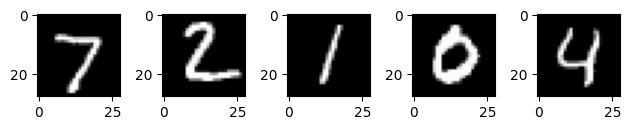

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(np.reshape(x_test[i],(28,28)),cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


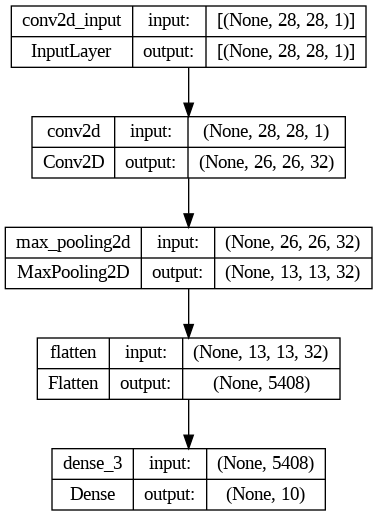

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True,to_file='model.png')

In [ ]:
y_prediction = model.predict(x_test[:2])

1/1 [==============================] - 0s 26ms/step


In [ ]:
y_prediction

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.8609708e-36,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.0193828e-31, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

이진 분류

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터 수집 및 전처리
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

y_train_odd_or_even = y_train % 2
y_test_odd_or_even = y_test % 2

# 인공신경망 모델 정의 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train_odd_or_even,epochs=10,verbose=False)

# 모델 테스트
y_prediction = model.predict(x_test)
for i in range(5):      # 데이터의 수가 많아 5까지만 출력
  print('y_prediction[',i,']:',y_prediction[i])
  if y_prediction[i] < 0.5:
    print(y_test[i],': 짝수')
  else:
    print(y_test[i],': 홀수')

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test_odd_or_even)
print('손실:', loss)
print('정확도:', accuracy)

313/313 [==============================] - 1s 3ms/step
y_predict[ 0 ]: [0.9999999]
7 : 홀수
y_predict[ 1 ]: [3.5735456e-10]
2 : 짝수
y_predict[ 2 ]: [0.9497565]
1 : 홀수
y_predict[ 3 ]: [1.10629935e-05]
0 : 짝수
y_predict[ 4 ]: [0.079747]
4 : 짝수
313/313 [==============================] - 1s 3ms/step - loss: 0.2031 - accuracy: 0.9482
손실: 0.20306164026260376
정확도: 0.948199987411499
